# Google Colab 데이터 로드

In [1]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
study = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수3.csv']),
                       encoding='cp949')
study


"\n#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.\nfrom google.colab import files\nmyfile = files.upload()\nimport io\nimport pandas as pd\n#pd.read_csv로 csv파일 불러오기\nstudy = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수3.csv']),\n                       encoding='cp949')\nstudy\n"

# 로컬 데이터 로드

In [2]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
study = pd.read_csv('../../머신러닝실습용자료/공부시간과시험점수3.csv',encoding='cp949')
study

,이름,공부시간,학원수,시험점수
0,이원재,15.0,5,89.0
1,맹승주,14.5,5,86.5
2,안미경,14.0,5,86.0
3,서진수,13.5,4,85.5
4,황경인,13.0,4,85.0
5,신운무,12.0,4,83.0
6,권율,12.0,3,85.0
7,강준,11.0,3,82.0
8,신사임당,11.0,3,83.0
9,문무왕,10.5,3,82.0


# 공통 실습 코드

## 특성공학
기존의 Feature 활용하여 새로운 feature 생성

In [3]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
data = study[ ['공부시간','학원수'] ]
target = study['시험점수']

from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , test_size=0.2 , random_state=40)

In [4]:
# 새로운 특성을 생성합니다
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit( 훈련용_data )

훈련용_data_new = poly.transform(훈련용_data) # 새로운 특성 만들기
테스트용_data_new = poly.transform(테스트용_data) # 새로운 특성 만들기
print(훈련용_data_new)  
print(훈련용_data_new.shape)

[[ 13.5    4.   182.25  54.    16.  ]
 [  8.     1.    64.     8.     1.  ]
 [ 14.     5.   196.    70.    25.  ]
 [ 10.     2.   100.    20.     4.  ]
 [  8.5    1.    72.25   8.5    1.  ]
 [ 13.     4.   169.    52.    16.  ]
 [ 11.     3.   121.    33.     9.  ]
 [  9.     1.    81.     9.     1.  ]
 [  7.5    1.    56.25   7.5    1.  ]
 [  8.2    1.    67.24   8.2    1.  ]
 [ 15.     5.   225.    75.    25.  ]
 [ 10.5    3.   110.25  31.5    9.  ]
 [ 10.5    2.   110.25  21.     4.  ]
 [  7.5    1.    56.25   7.5    1.  ]
 [ 10.     2.   100.    20.     4.  ]
 [ 14.5    5.   210.25  72.5   25.  ]
 [  8.5    1.    72.25   8.5    1.  ]
 [ 12.     4.   144.    48.    16.  ]
 [ 11.     3.   121.    33.     9.  ]
 [ 12.     3.   144.    36.     9.  ]]
(20, 5)


In [5]:
#생성된 특성 내역 보기
# 공부시간 , 학원수 , 공부시간^2 , 공부시간 x 학원수 , 학원수^2
import warnings

# 경고 메세지를 없애주는 코드
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore', category=FutureWarning)
  print(poly.get_feature_names_out() )

['공부시간' '학원수' '공부시간^2' '공부시간 학원수' '학원수^2']


In [6]:
# 모델 평가하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(훈련용_data_new , 훈련용_target)

print('훈련용 데이터 점수:',lr.score(훈련용_data_new, 훈련용_target))
print('테스트용 데이터 점수:',lr.score(테스트용_data_new, 테스트용_target))

훈련용 데이터 점수: 0.9793864381559351
테스트용 데이터 점수: 0.5870610828812628


## 릿지 규제(L2 규제)
경사하강법시 큰 가중치에 대한 규제는 강하게, 작은 가중치에 대한 규제는 약하게줘서, 모든 가중치들이 모델에 고르게 반영되도록 한다.

In [8]:
# 규제 - 릿지와 라쏘 활용

# 데이터 정규화 하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(훈련용_data_new)
정규화_훈련용_data = ss.transform(훈련용_data_new)
정규화_테스트용_data = ss.transform(테스트용_data_new)

In [10]:
# 릿지 회귀 사용하기
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(정규화_훈련용_data, 훈련용_target)
print(ridge.score(정규화_훈련용_data, 훈련용_target))
print(ridge.score(정규화_테스트용_data, 테스트용_target))

0.9446154195709993
0.7606092268041652


In [13]:
# 릿지 규제의 alpha 값 찾기
import matplotlib.pyplot as plt
훈련용점수 = []
테스트용점수=[]

alpha_value = [0.001, 0.01, 0.1 , 1 , 10 , 100 ]
for a in alpha_value :
  ridge = Ridge(alpha=a)
  ridge.fit(정규화_훈련용_data , 훈련용_target)
  훈련용점수.append(ridge.score(정규화_훈련용_data , 훈련용_target))
  테스트용점수.append(ridge.score(정규화_테스트용_data , 테스트용_target))

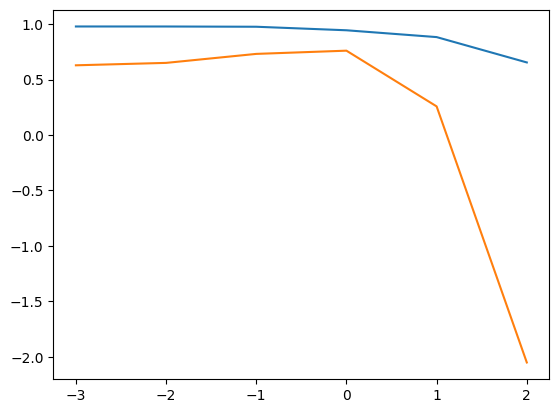

In [14]:
#점수값을 로그값으로 변환하여 그래프로 출력
import numpy as np
plt.plot(np.log10(alpha_value) , 훈련용점수)
plt.plot(np.log10(alpha_value) , 테스트용점수)
plt.show()

In [20]:
# 릿지 회귀 사용하기
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(정규화_훈련용_data, 훈련용_target)
print(ridge.score(정규화_훈련용_data, 훈련용_target))
print(ridge.score(정규화_테스트용_data, 테스트용_target))

0.9446154195709993
0.7606092268041652


In [16]:
import warnings
with warnings.catch_warnings():
  warnings.simplefilter(action='ignore', category=FutureWarning)
  print(ridge.coef_)
  print(poly.get_feature_names_out())

[ 3.45633911  2.74435513  1.21957546 -0.23519014 -2.74919439]
['공부시간' '학원수' '공부시간^2' '공부시간 학원수' '학원수^2']


In [17]:
릿지컬럼_df = pd.DataFrame()
alphas = [0.01,0.1,0,1,10,100]
for pos , alpha in enumerate(alphas) :
  ridge = Ridge(alpha=alpha)
  ridge.fit(정규화_훈련용_data, 훈련용_target)
  with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    회귀계수 = pd.Series(data = ridge.coef_ , index=poly.get_feature_names_out())
  colname = 'alpha:'+ str(alpha)
  릿지컬럼_df[colname]=회귀계수

ridge_alpha=[0.01,0.1,0,1,10,100]
sort_column = 'alpha:' + str(ridge_alpha[0])

릿지컬럼_df.sort_values(by=sort_column , ascending=False)

,alpha:0.01,alpha:0.1,alpha:0,alpha:1,alpha:10,alpha:100
학원수,4.977679,4.116473,-9.375447,1.833223,0.902520,0.450400
공부시간,3.528308,4.006014,18.028431,2.699910,1.146557,0.477636
공부시간^2,1.279523,1.035725,-23.567662,1.284828,0.927298,0.455674
공부시간 학원수,0.582112,-0.417811,35.772089,0.104132,0.672635,0.429095
학원수^2,-5.930497,-4.293283,-16.631284,-1.513210,0.392686,0.395148


## 라쏘 규제(L1 규제)
크기가 작은 가중치 회귀계수값 들을 0 으로 수렴시켜 모델에게 중요한 가중치만 남도록 만든다.

In [32]:
# 라쏘 회귀 사용하기
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(정규화_훈련용_data, 훈련용_target)
print(lasso.score(정규화_훈련용_data, 훈련용_target))
print(lasso.score(정규화_테스트용_data, 테스트용_target))

0.9351696147641343
0.8723343687301421


In [22]:
# 라쏘 규제의 alpha 값 찾기
import matplotlib.pyplot as plt
훈련용점수 = []
테스트용점수=[]

alpha_value = [0.001 ,0.01, 0.1 , 1 , 10 , 100 ]
for a in alpha_value :
  lasso = Lasso(alpha=a , max_iter=10000)
  lasso.fit(정규화_훈련용_data , 훈련용_target)
  훈련용점수.append(lasso.score(정규화_훈련용_data , 훈련용_target))
  테스트용점수.append(lasso.score(정규화_테스트용_data , 테스트용_target))

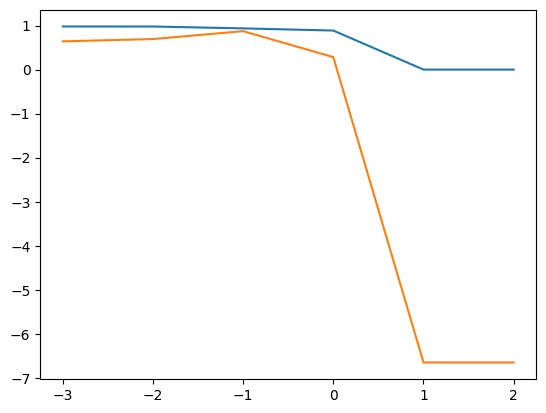

In [23]:
#점수값을 로그값으로 변환하여 그래프로 출력
import numpy as np
plt.plot(np.log10(alpha_value) , 훈련용점수)
plt.plot(np.log10(alpha_value) , 테스트용점수)
plt.show()

In [24]:
라쏘컬럼_df = pd.DataFrame()
alphas = [0.001, 0.01 , 0.1 , 0 , 1 , 10 , 100]
for pos , alpha in enumerate(alphas) :
  lasso = Lasso(alpha=alpha , max_iter=1000)
  
  with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=UserWarning)
    lasso.fit(정규화_훈련용_data, 훈련용_target)
    회귀계수 = pd.Series(data = lasso.coef_ , index=poly.get_feature_names_out())
  colname = 'alpha:'+ str(alpha)
  라쏘컬럼_df[colname]=회귀계수
lasso_alpha=[0.01,0.1,0,1,10,100]
sort_column = 'alpha:' + str(lasso_alpha[0])
라쏘컬럼_df.sort_values(by=sort_column , ascending=False)

,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0,alpha:1,alpha:10,alpha:100
공부시간,4.198087,4.883949,4.675539,4.322366,3.555816,0.0,0.0
학원수,4.970419,4.231290,0.000000,4.748804,0.000000,0.0,0.0
공부시간^2,0.745734,0.000000,0.000000,0.358403,0.000000,0.0,0.0
공부시간 학원수,0.000000,0.000000,-0.000000,0.944134,0.000000,0.0,0.0
학원수^2,-5.468918,-4.667752,-0.230352,-5.934979,0.000000,0.0,0.0
